In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [2]:
file_path='/kaggle/input/calcofi/bottle.csv'
data=pd.read_csv(file_path)
data_mod=data[['T_degC','Salnty']]
data_mod=data_mod.dropna()
data_mod.describe()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,T_degC,Salnty
count,814247.000000,814247.000000
mean,10.860287,33.841337
std,4.224930,0.461636
min,1.440000,28.431000
25%,7.750000,33.489000
50%,10.110000,33.866000
75%,13.930000,34.197000
max,31.140000,37.034000


In [3]:
X=data_mod[['T_degC']].values
y=data_mod[['Salnty']].values
from sklearn.model_selection import train_test_split
traX,valX,tray,valy=train_test_split(X,y,random_state=50)

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(traX,tray)

LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predicted_vals=model.predict(valX)
mae=mean_absolute_error(valy,predicted_vals)
rmse=mean_squared_error(valy,predicted_vals,squared=False)
mae,rmse

(0.27907551985470963, 0.397990206545378)

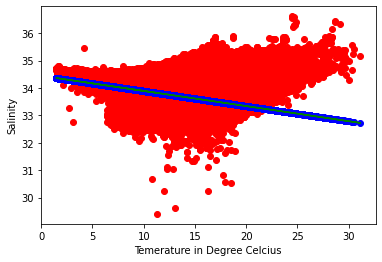

In [6]:
import matplotlib.pyplot as plt
plt.scatter(valX,valy,c='r')
plt.scatter(valX,predicted_vals,c='b')
plt.plot(valX,predicted_vals,color='g')
plt.xlabel('Temerature in Degree Celcius')
plt.ylabel('Salinity')
plt.show()